In [ ]:
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
from io import BytesIO
from PIL import Image
import PIL, requests
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
u="null"

In [ ]:
def datos(user):
  try:
    idUser = str(user)
    url='https://es.stackoverflow.com/users/'+idUser+'/?tab==profile'
    res=requests.get(url)
    html=res.text
    soup=BeautifulSoup(html,"html.parser")
    datos=soup.find_all("div", class_="grid--cell fs-title fc-dark")
    dato2=soup.find_all("div", class_="grid--cell fw-bold")
    dato3=soup.find_all("div", class_="grid--cell fs-body3 fc-dark fw-bold")
    dato4=soup.find_all("span", class_="relativetime")
    dato5=soup.find_all("div", class_="grid--cell fl1")
    reputacion=re.search('>(.+?)<',str(datos))
    usuario=re.search('>(.+?)<',str(dato2))
    respuestas=re.search('>(.+?)<',str(dato3[0]))
    preguntas=re.search('>(.+?)<',str(dato3[1]))
    alcance=re.search('>~(.+?)<',str(dato3[2]))
    tiempo=re.search('>(.+?)<',str(dato5[len(dato5)-4]))
    visitas=re.search('>(.+?)<',str(dato5[len(dato5)-3]))
    ultima=re.search('>(.+?)<',str(dato4))
    data={'reputacion':reputacion.group(1),'usuario':usuario.group(1),'respuestas':respuestas.group(1),'preguntas':preguntas.group(1),
    'alcance':alcance.group(1),
    'tiempo':tiempo.group(1),
    'visitas':visitas.group(1),'ultima visita':ultima.group(1)}
    df = pd.DataFrame([[key, data[key]] for key in data.keys()], columns=['DATOS', 'VALORES'])
    return df
  except:
    print("FINALIZADO")

In [ ]:
def creacionNubeDesdeCero(tag_list):
  crearMascara(tag_list)

In [ ]:
def obtenerTagsDeUsuario(idUser):
  idUser = str(idUser)
  url1='https://es.stackoverflow.com/users/'
  url2='/?tab=tags'
  url=url1+idUser+url2
  res=requests.get(url)
  html=res.text
  soup=BeautifulSoup(html,"html.parser")
  tags=soup('a')
  lista=[]
  tag_list=[]
  for i in tags:
    lista.append(i.get('href'))
  for a in lista:
    if re.search(r"\[([A-Za-z0-9_]+)\]", str(a)):
      m = re.search(r"\[([A-Za-z0-9_]+)\]", str(a))
      #print(m.group(1))
      tag_list.append(m.group(1))
  
  return tag_list

In [ ]:
def validarUsuario(tag_list):
  if len(tag_list)>0:
    print("Usuario encontrado en STACKOVERFLOW.COM\n")
    flag=True
  else:
    print("Usuario no encontrado, Ingrese un usuario valido\n")
    flag=False
  return flag

In [ ]:
def contarTags(tag_list):
  print("Cantidad de Tags del usuario: "+str(len(tag_list))+"\n")
  flag = validarUsuario(tag_list)
  return flag

In [ ]:
def crearMascara(tag_list):
  url1="https://i.postimg.cc/y6fv5Gmq/btm.png"
  url2="https://i.postimg.cc/KYr55pGH/cloud.png"
  url3="https://i.postimg.cc/d15mb7TR/gku.png"
  url4="https://i.postimg.cc/KjV7YdfR/pyt.jpg"
  imagen1=requests.get(url1)
  imagen2=requests.get(url2)
  imagen3=requests.get(url3)
  imagen4=requests.get(url4)
  img=Image.open(BytesIO(imagen1.content))
  img2=Image.open(BytesIO(imagen2.content))
  img3=Image.open(BytesIO(imagen3.content))
  img4=Image.open(BytesIO(imagen4.content))
  mask=np.array(img)
  mask2=np.array(img2)
  mask3=np.array(img3)
  mask4=np.array(img4)
  texto=''
  for n in tag_list:
    texto+=n+","
  palabras=texto.split(sep=',')
  crearDisenio(mask,mask2,mask3,mask4,tag_list,texto)

In [ ]:
def crearDisenio(mask,mask2,mask3,mask4,tag_list,texto):
  num=0
  color=""
  while num<1 or num>6:
    num=int(validarEntrada("ESCOJA EL COLOR DE FONDO \n1.-BLANCO\n2.-NEGRO\n3.-ROJO\n4.-AMARILLO\n5.-VERDE\n6.-CELESTE\n"))
  if num==1:
    color="white"
  elif num==2:
    color="black"
  elif num==3:
    color="red"
  elif num==4:
    color="yellow"
  elif num==5:
    color="green"
  elif num==6:
    color="cyan"
  valor=len(tag_list)
  wc = WordCloud(stopwords=STOPWORDS,
        mask=mask, background_color=color,
        max_words=valor, max_font_size=256,
        random_state=42, width=mask.shape[1],
        height=mask.shape[0])
  wc2 = WordCloud(stopwords=STOPWORDS,
        mask=mask2, background_color=color,
        max_words=valor, max_font_size=256,
        random_state=42, width=mask.shape[1],
        height=mask.shape[0])    
  wc3 = WordCloud(stopwords=STOPWORDS,
        mask=mask3, background_color=color,
        max_words=valor, max_font_size=256,
        random_state=42, width=mask.shape[1],
        height=mask.shape[0])     
  wc4 = WordCloud(stopwords=STOPWORDS,
        mask=mask4, background_color=color,
        max_words=valor, max_font_size=256,
        random_state=42, width=mask.shape[1],
        height=mask.shape[0]) 
  generarWordcloud(wc,wc2,wc3,wc4,texto,tag_list)

In [ ]:
def generarWordcloud(wc,wc2,wc3,wc4,texto,tag_list):
  wc.generate(texto)
  wc2.generate(texto)
  wc3.generate(texto)
  wc4.generate(texto)
  mostrarImagenWordcloud(wc,wc2,wc3,wc4,tag_list)
  

In [ ]:
def mostrarImagenWordcloud(wc,wc2,wc3,wc4,tag_list):
  print("FORMA DE MURCIELAGO\n")
  plt.figure(figsize=(10, 10))
  plt.imshow(wc)
  plt.show()
  print("FORMA DE CEREBRO\n")
  plt.figure(figsize=(10, 10))
  plt.imshow(wc2)
  plt.show()
  print("FORMA DE GOKU\n")
  plt.figure(figsize=(10, 10))
  plt.imshow(wc3)
  plt.show()
  print("FORMA DE PYTHON\n")
  plt.figure(figsize=(10, 10))
  plt.imshow(wc4)
  plt.show()

In [ ]:
def validarEntrada(cadena):
  flag=False
  while flag == False:
    try:
      numero = input(cadena)
      int(numero)
      flag=True
    except:
      print("[Error]Ingrese dato numerico")
      flag=False
  return numero


Escriba el ID del usuario : 183782


Cantidad de Tags del usuario: 45

Usuario encontrado en STACKOVERFLOW.COM

ESCOJA EL COLOR DE FONDO 
1.-BLANCO
2.-NEGRO
3.-ROJO
4.-AMARILLO
5.-VERDE
6.-CELESTE
2
FORMA DE MURCIELAGO



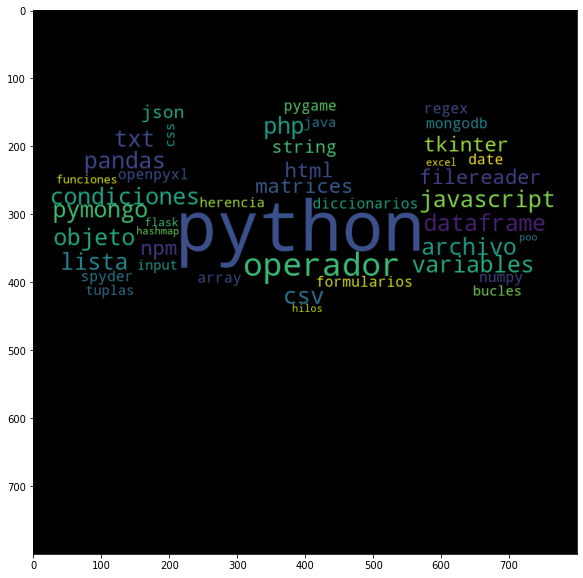

FORMA DE CEREBRO



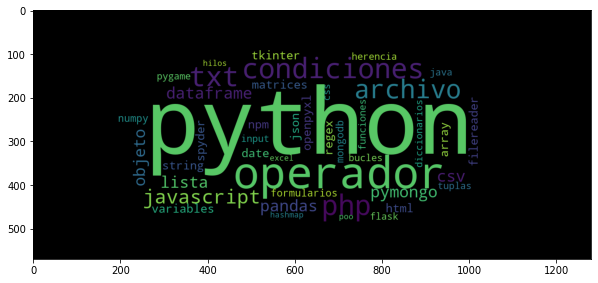

FORMA DE GOKU



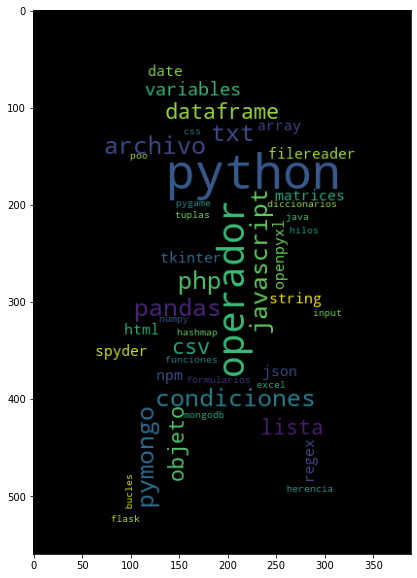

FORMA DE PYTHON



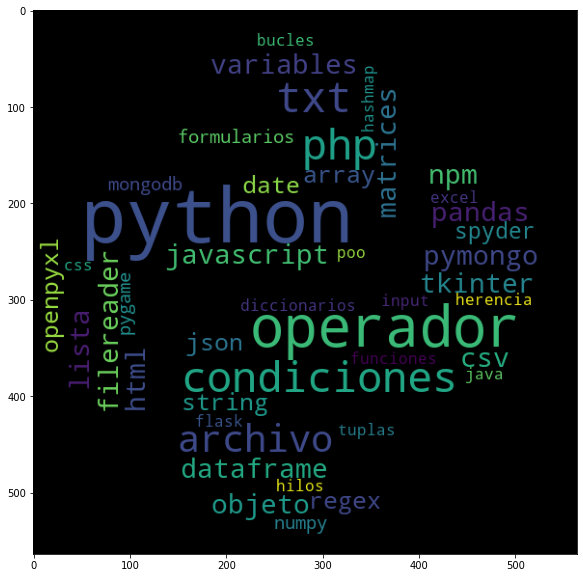

DATOS DEL USUARIO INGRESADO

FINALIZADO


In [ ]:
# ==============================  CÓDIGO PRINCIPAL ============================
bandera = False
while bandera == False:
  #idUsuario = int(input("Escriba el ID del usuario :"))s
  idUsuario = validarEntrada("\nEscriba el ID del usuario : ")
  print("\n")
  #Extraer los tags del Usuario
  tag_list = obtenerTagsDeUsuario(idUsuario)
  #Pasar como parámetro la lista de los TAGS en cada función
  bandera=contarTags(tag_list)

#Proceso creacion de Nube de palabras
creacionNubeDesdeCero(tag_list)
print("DATOS DEL USUARIO INGRESADO\n")
datos(idUsuario)

In [ ]:
%%writefile prime.py
"""WORDCLOUD"""
import re
from io import BytesIO
import numpy as np
import requests
from wordcloud.wordcloud import STOPWORDS, WordCloud
import matplotlib.pyplot as plt
from PIL import Image
from bs4 import BeautifulSoup
import pandas as pd
class Mascara:
    """CLASE"""
    def __init__(self,nombre_mascara,taglist):
        """CONSTRUCTOR"""
        self.nombre=nombre_mascara
        self.taglist=taglist
    def __str__(self) -> str:
        """STR"""
        return self.nombre
    # pylint: disable-msg=too-many-locals
    def crearmascara(self):
        """FUNCION"""
        url1="https://i.postimg.cc/y6fv5Gmq/btm.png"
        url2="https://i.postimg.cc/KYr55pGH/cloud.png"
        url3="https://i.postimg.cc/d15mb7TR/gku.png"
        url4="https://i.postimg.cc/KjV7YdfR/pyt.jpg"
        imagen1=requests.get(url1)
        imagen2=requests.get(url2)
        imagen3=requests.get(url3)
        imagen4=requests.get(url4)
        img=Image.open(BytesIO(imagen1.content))
        img2=Image.open(BytesIO(imagen2.content))
        img3=Image.open(BytesIO(imagen3.content))
        img4=Image.open(BytesIO(imagen4.content))
        mask=np.array(img)
        mask2=np.array(img2)
        mask3=np.array(img3)
        mask4=np.array(img4)
        texto=''
        for value in self.taglist:
            texto+=value+","
        return mask,mask2,mask3,mask4,self.taglist,texto
class Usuario:
    """CLASE"""
    def __init__(self,id_user,ntag=None,taglist=None):
        """CONSTRUCTOR"""
        self.id_user=id_user
        self.ntag=ntag
        self.taglist=taglist
        self.obj_nube=Nube("prueba",self.taglist)
        self.obj_val=Validar("user")
    def __str__(self) -> str:
        """FUNCION"""
        return self.id_user
    def iniciar(self):
        """FUNCION"""
        self.obj_nube.creacionnubedesdecero()
    # pylint: disable-msg=too-many-locals
    def begin(self):
        """FUNCION"""
        iduser = str(self.id_user)
        url='https://es.stackoverflow.com/users/'+iduser+'/?tab==profile'
        res=requests.get(url)
        html=res.text
        soup=BeautifulSoup(html,"html.parser")
        datos=soup.find_all("div", class_="grid--cell fs-title fc-dark")
        dato2=soup.find_all("div", class_="grid--cell fw-bold")
        dato3=soup.find_all("div", class_="grid--cell fs-body3 fc-dark fw-bold")
        dato4=soup.find_all("span", class_="relativetime")
        dato5=soup.find_all("div", class_="grid--cell fl1")
        try:
            reputacion=re.search('>(.+?)<',str(datos))
            usuario=re.search('>(.+?)<',str(dato2))
            respuestas=re.search('>(.+?)<',str(dato3[0]))
            preguntas=re.search('>(.+?)<',str(dato3[1]))
            alcance=re.search('>~(.+?)<',str(dato3[2]))
            tiempo=re.search('>(.+?)<',str(dato5[len(dato5)-4]))
            visitas=re.search('>(.+?)<',str(dato5[len(dato5)-3]))
            ultima=re.search('>(.+?)<',str(dato4))
            data={'reputacion':reputacion.group(1),'usuario':usuario.group(1),
            'respuestas':respuestas.group(1),'preguntas':preguntas.group(1),
            'alcance':alcance.group(1),
            'tiempo':tiempo.group(1),
            'visitas':visitas.group(1),
            'ultima visita':ultima.group(1)}
            dataf = pd.DataFrame([[key, val] for key,val in data.items()],
            columns=['DATOS', 'VALORES'])
            return dataf
        except ValueError:
            print("finish")
    def obtenertagsdeusuario(self):
        """FUNCION"""
        iduser = str(self.id_user)
        url1='https://es.stackoverflow.com/users/'
        url2='/?tab=tags'
        url=url1+iduser+url2
        res=requests.get(url)
        html=res.text
        soup=BeautifulSoup(html,"html.parser")
        tags=soup('a')
        lista=[]
        tag_list=[]
        for value in tags:
            lista.append(value.get('href'))
        for value in lista:
            if re.search(r"\[([A-Za-z0-9_]+)\]", str(value)):
                mix = re.search(r"\[([A-Za-z0-9_]+)\]", str(value))
                #print(m.group(1))
                tag_list.append(mix.group(1))
        return tag_list
    def contartags(self,taglist):
        """FUNCION"""
        print("Cantidad de Tags del usuario: "+str(len(taglist))+"\n")
        flag = self.obj_val.validarusuario(taglist)
        return flag
class Validar:
    """CLASE"""
    def __init__(self,tipo):
        """FUNCION"""
        self.tipo=tipo
    def __str__(self) -> str:
        """FUNCION"""
        return self.tipo
    # pylint: disable=R0201
    def validarusuario(self,taglist):
        """FUNCION"""
        if len(taglist)>0:
            print("Usuario encontrado en STACKOVERFLOW.COM\n")
            flag=False
        else:
            print("Usuario no encontrado, Ingrese un usuario valido\n")
            flag=True
        return flag
    def validarentrada(self,cadena):
        """funcion"""
        flag=True
        while flag:
            try:
                numero = input(cadena)
                int(numero)
                flag=False
            except ValueError:
                print("[Error]Ingrese dato numerico")
                flag=True
        return numero
    #pylint: disable=too-many-arguments
    def generarwordcloud(self,wc1,wc2,wc3,wc4,text):
        """FUNCION"""
        wc1.generate(text)
        wc2.generate(text)
        wc3.generate(text)
        wc4.generate(text)
        Nube.mostrarimagenwordcloud(self,wc1,wc2,wc3,wc4)
class Nube:
    """CLASE"""
    def __init__(self,nombre_nube,taglist):
        """CONSTRUCTOR"""
        self.nombre_nube=nombre_nube
        self.taglist=taglist
        self.obj_mask=Mascara("prueba",self.taglist)
        self.obj_val=Validar("nube")
    def __str__(self) -> str:
        """FUNCION"""
        return self.nombre_nube
    # pylint: disable=R0201
    def mostrarimagenwordcloud(self,wc1,wc2,wc3,wc4):
        """FUNCION"""
        print("FORMA DE MURCIELAGO\n")
        plt.figure(figsize=(10, 10))
        plt.imshow(wc1)
        plt.show()
        print("FORMA DE CEREBRO\n")
        plt.figure(figsize=(10, 10))
        plt.imshow(wc2)
        plt.show()
        print("FORMA DE GOKU\n")
        plt.figure(figsize=(10, 10))
        plt.imshow(wc3)
        plt.show()
        print("FORMA DE PYTHON\n")
        plt.figure(figsize=(10, 10))
        plt.imshow(wc4)
        plt.show()
    def creacionnubedesdecero(self):
        """FUNCION"""
        mask,mask2,mask3,mask4,tag,text=self.obj_mask.crearmascara()
        num=0
        color=""
        while num<1 or num>6:
            num=int(Validar.validarentrada(self,"ESCOJA EL COLOR DE FONDO \n1.-BLANCO\n2."+
            "-NEGRO\n3.-ROJO\n4.-AMARILLO\n5.-VERDE\n6.-CELESTE\n"))
        if num==1:
            color="white"
        elif num==2:
            color="black"
        elif num==3:
            color="red"
        elif num==4:
            color="yellow"
        elif num==5:
            color="green"
        elif num==6:
            color="cyan"
        valor=len(tag)
        wc1 = WordCloud(stopwords=STOPWORDS,
                mask=mask, background_color=color,
                max_words=valor, max_font_size=256,
                random_state=42, width=mask.shape[1],
                height=mask.shape[0])
        wc2 = WordCloud(stopwords=STOPWORDS,
                mask=mask2, background_color=color,
                max_words=valor, max_font_size=256,
                random_state=42, width=mask.shape[1],
                height=mask.shape[0])
        wc3 = WordCloud(stopwords=STOPWORDS,
                mask=mask3, background_color=color,
                max_words=valor, max_font_size=256,
                random_state=42, width=mask.shape[1],
                height=mask.shape[0])
        wc4 = WordCloud(stopwords=STOPWORDS,
                mask=mask4, background_color=color,
                max_words=valor, max_font_size=256,
                random_state=42, width=mask.shape[1],
                height=mask.shape[0])
        self.obj_val.generarwordcloud(wc1,wc2,wc3,wc4,text)
# ==============================  CÓDIGO PRINCIPAL ============================
# pylint: disable=R0201
class Main():
    """CLASE"""
    def data(self,user):
        """data"""
        user.begin()
    def main(self):
        """MAIN"""
        print("ejecutando ....")
        band = True
        while band:
            #idUsuario = int(input("Escriba el ID del usuario :"))s
            idusuario = Validar("user").validarentrada("\nEscriba el ID del usuario : ")
            print("\n")
            userx=Usuario(idusuario)
            #Extraer los tags del Usuario
            taglist = userx.obtenertagsdeusuario()
            userx2=Usuario(idusuario,taglist)
            print(len(taglist))
            #Pasar como parámetro la lista de los TAGS en cada función
            band=userx2.contartags(taglist)
        print("DATOS DEL USUARIO INGRESADO\n")
        user=Usuario(idusuario,str(len(taglist)),taglist)
        user.iniciar()
        self.data(user)
Main().main()


Overwriting prime.py


In [ ]:
!pyreverse /content/prime.py
!dot -Tpng -o classes.png classes.dot

parsing /content/prime.py...


In [ ]:
#INSTALAMOS LA LIBRERIA PYLINT
!pip install pylint

In [ ]:
#EJECUTAMOS PYLINT EN EL ARCHIVO .PY
!pylint prime.py

************* Module prime
prime.py:252:0: C0304: Final newline missing (missing-final-newline)
prime.py:59:4: R1710: Either all return statements in a function should return an expression, or none of them should. (inconsistent-return-statements)

------------------------------------------------------------------
Your code has been rated at 9.90/10 (previous run: 9.79/10, +0.10)

